In [45]:
import numpy
import matplotlib
from scipy.signal import hilbert, chirp 
import scipy.signal as signal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
data=loadtxt('CAPA_2.txt',skiprows=1)

In [47]:
data2=zeros(256)
data2=data.reshape(256)


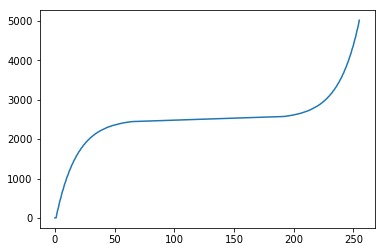

In [48]:
plot(data2)

In [49]:
data3=loadtxt('030309_2.txt',skiprows=1)

In [50]:
print max(data3[:,2])

4743.0


In [51]:
print min(data3[:,2])

0.0


In [52]:
print max(data3[:,0]),min(data3[:,0]),max(data3[:,1]),min(data3[:,1])

300.0 0.0 255.5 0.0


In [53]:
x=arange(0,300)
y=arange(0,256,0.5)
shape(y)

(512L,)

In [54]:
ix=300 
iy=512

In [55]:
z=zeros(ix*iy).reshape(iy,ix)

In [56]:
k=0
for j in range(ix):
    for i in range(iy):
        z[i,j]=float(data3[k,2])
        # G[i,j]=data2[int(z[i,j])]
 
        k=k+1
        
        

In [57]:
G=zeros(ix*iy).reshape(iy,ix)
Gh=zeros(ix*iy).reshape(iy,ix)

In [58]:

k=0
for j in range(ix):
    for i in range(iy):
        G[i,j]=float(data3[k,2])
        #G[i,j]=data2[int(z[i,j])]
        
        k=k+1
        

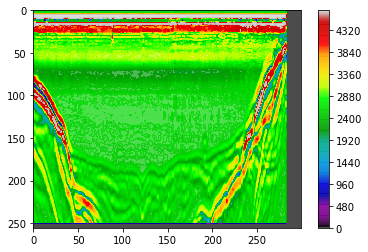

In [59]:
ylim(255.5,0)
contourf(x,y,G,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()


### Баттерворт фильтр

In [60]:
Gb=zeros(ix*iy).reshape(iy,ix)
N=len(Gb[:,0])
freq=1./float(N)
# First, design the Buterworth filter
N  = 3    # Filter order
#Wn = 0.01 # Cutoff frequency
Wn=50.*freq
for i in range(ix):
    B, A = signal.butter(N, Wn, output='ba')
    # Second, apply the filter
    Gb[:,i] = signal.filtfilt(B,A,G[:,i] )

In [61]:
signal=zeros(iy)
for i in range(ix):
    signal=Gb[:,i]-mean(Gb[:,i])
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    Gh[:,i]=amplitude_envelope


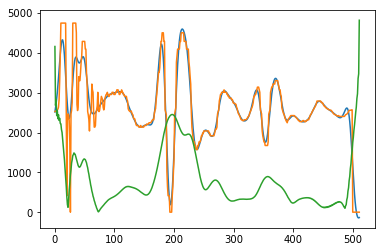

In [62]:
plot(Gb[:,10])
plot(G[:,10])
plot (Gh[:,10])

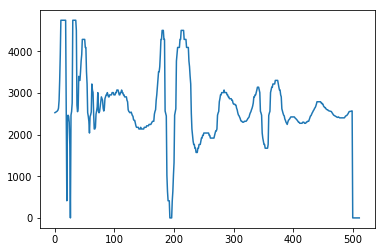

In [63]:
plot(z[:,10])

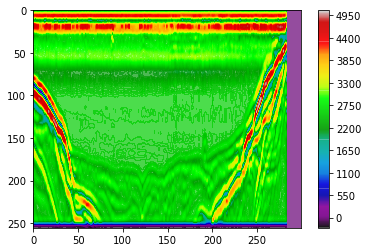

In [64]:
ylim(255.5,0)
contourf(x,y,Gb,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()


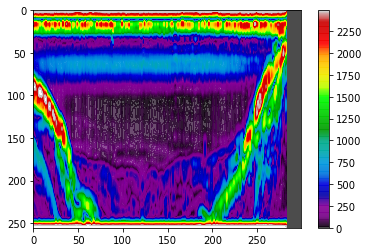

In [71]:
#преобразование Гильберта (для определения среды)
ylim(255.5,0)
levels=arange(0,2500,10)
contourf(x,y,Gh,levels,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
